In [1]:
import numpy as np
import pandas as pd
import spacy
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set()

C:\Users\iman_\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(20)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


In [5]:
df['message'][14]

'Fossil fuel giant ExxonMobil ‘misled’ the public about climate change, Harvard academics conclude https://t.co/ofc2WSu4EX'

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [7]:
df.describe(include='all')

,sentiment,message,tweetid
count,15819.000000,15819,15819.000000
unique,NaN,14229,NaN
top,NaN,RT @StephenSchlegel: she's thinking about how ...,NaN
freq,NaN,307,NaN
mean,0.917504,NaN,501719.433656
std,0.836537,NaN,289045.983132
min,-1.000000,NaN,6.000000
25%,1.000000,NaN,253207.500000
50%,1.000000,NaN,502291.000000
75%,1.000000,NaN,753769.000000


In [8]:
#df['Tweets'] = df['message'].apply(clean_text)

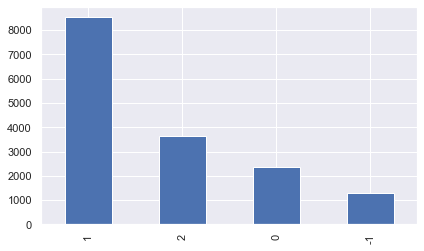

In [9]:
df['sentiment'].value_counts().plot(kind='bar')
## judging from this, sentiment analysis 1 makes up most of the 

# Examining Twitter Mentions

In [10]:
df['Split_tweets'] = [i.split() for i in df['message']]

In [11]:
df['mentions'] = df.message.str.findall(r'(?<![@\w])@(\w{1,25})').apply(','.join)

In [12]:
df['mentions'].nunique()

6902

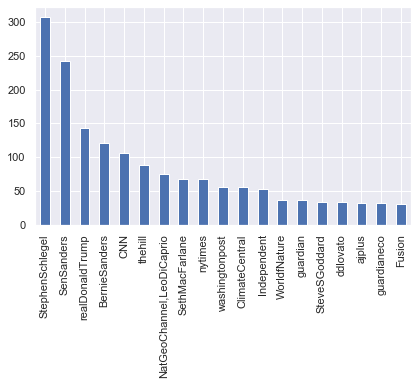

In [13]:
df['mentions'].value_counts()[1:20].plot(kind='bar')
plt.show()

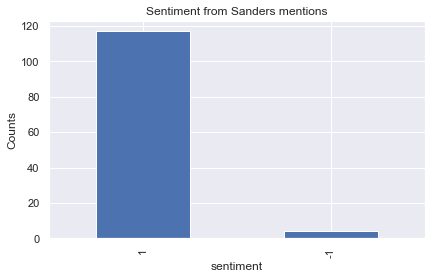

In [14]:
df[df['mentions'] == 'BernieSanders']['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('sentiment')
plt.ylabel('Counts')
plt.title('Sentiment from Sanders mentions')
plt.show()

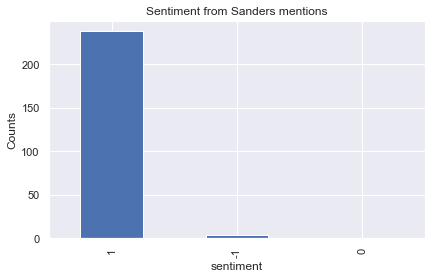

In [15]:
df[df['mentions'] == 'SenSanders']['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('sentiment')
plt.ylabel('Counts')
plt.title('Sentiment from Sanders mentions')
plt.show()

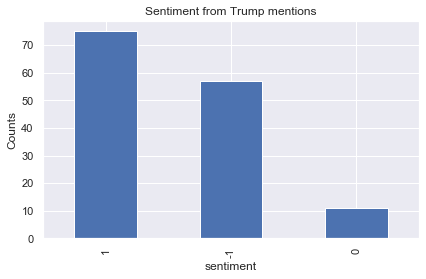

In [16]:
df[df['mentions'] == 'realDonaldTrump']['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('sentiment')
plt.ylabel('Counts')
plt.title('Sentiment from Trump mentions')
plt.show()

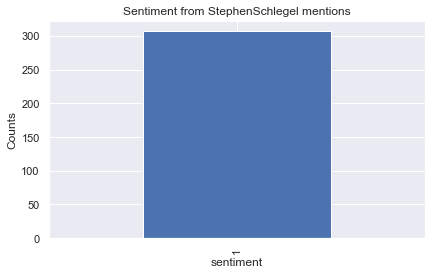

In [17]:
df[df['mentions'] == 'StephenSchlegel']['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('sentiment')
plt.ylabel('Counts')
plt.title('Sentiment from StephenSchlegel mentions')
plt.show()

From this analysis of the top mentions, we can tell that the type of mentions affect sentiment thus we can keep our @user mentions

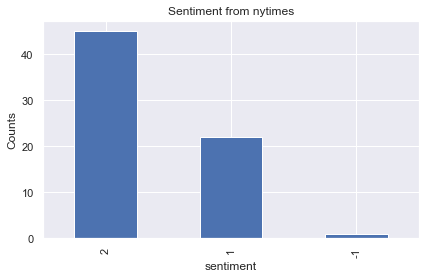

In [18]:
df[df['mentions'] == 'nytimes']['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('sentiment')
plt.ylabel('Counts')
plt.title('Sentiment from nytimes')
plt.show()

Looking at the distribution of a reputable source like NY Times, we can see that most sentiment is directed to real news sentiment thus we can assume that most mentions with a Named Entity will fall into this sentiment category.

## Find all hashtags

In [19]:
def hashtag_extractor(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

In [20]:
HT_neg = hashtag_extractor(df['message'][df['sentiment'] == -1])
HT_neutral = hashtag_extractor(df['message'][df['sentiment'] == 0])
HT_pos = hashtag_extractor(df['message'][df['sentiment'] == 1])
HT_news = hashtag_extractor(df['message'][df['sentiment'] == 2])

HT_neg = sum(HT_neg, [])
HT_neutral = sum(HT_neutral, [])
HT_pos = sum(HT_pos, [])
HT_news = sum(HT_news, [])

In [21]:
HT_neg

['NoMoreSCAMS',
 'NoMoreDEMOCRATS',
 'DrainTheSwamp',
 'fakenews',
 'myth',
 'maga',
 'stepfoÃ',
 'OpChemtrails',
 'earthday',
 'miamibeachbowl',
 'liberals',
 'LiberalLogic',
 'Trump',
 'QandA',
 'Snow',
 'Egypt',
 'Trump',
 'ClimateChange',
 'MarchforBabies',
 'lies',
 'Economy',
 'National',
 'LondonAttacks',
 'StandUpForScience',
 'CashinIn',
 'ClimateScam',
 'GreenScam',
 'TeaParty',
 'tcot',
 'PJNet',
 'OpChemtrails',
 'blizzard2017',
 'OpChemtrails',
 'MAGA',
 'TrumpTrain',
 'Dobbs',
 'feedly',
 'ScienceCelebs',
 'libtards',
 'UnicornsAreReal',
 'Snowflakes',
 'WhyWeMustImpeachTrumpIn7Words',
 'PresidentTrump',
 'Day1Promises',
 'Obamacare',
 'MAGA',
 'BullShit',
 'FakeScience',
 'Eugenics',
 'Science',
 'TaxDay',
 'Trump',
 'sad',
 'climate',
 'Eco',
 'Green',
 'Trump',
 'QandA',
 'planetx',
 'Trump',
 'ParisAgreement',
 'GoreEffect',
 'a',
 'STFU',
 'MAGA',
 'peoplesclimatemarch',
 'UnitedNations',
 'CO2',
 'NewVettingQuestions',
 'MAGA',
 'IAmAClim',
 'SnakeOilSales',
 'liars

In [22]:
p = nltk.FreqDist(HT_neg)
p

FreqDist({'MAGA': 11, 'climate': 10, 'Trump': 7, 'climatechange': 6, 'OpChemtrails': 4, 'tcot': 4, 'ParisAgreement': 4, 'fakenews': 3, 'QandA': 3, 'ClimateScam': 3, ...})

In [23]:
p = nltk.FreqDist(HT_neg)
d = pd.DataFrame({'Hashtag': list(p.keys()), 'Count': list(p.values())})

d

,Hashtag,Count
0,NoMoreSCAMS,1
1,NoMoreDEMOCRATS,1
2,DrainTheSwamp,2
3,fakenews,3
4,myth,1
...,...,...
173,cdnpoli,1
174,media,1
175,Brrrr,1
176,hypocrisy,1


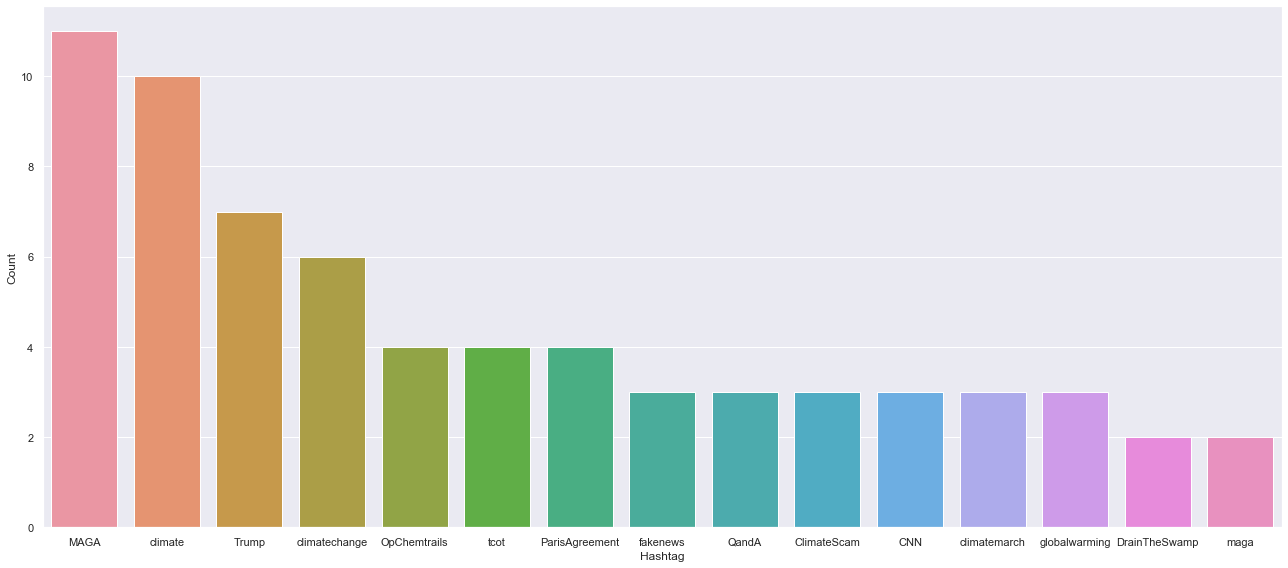

In [24]:
p = nltk.FreqDist(HT_neg)
d = pd.DataFrame({'Hashtag': list(p.keys()), 'Count': list(p.values())})
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=d, x = 'Hashtag', y = 'Count')
plt.tight_layout()
plt.show()

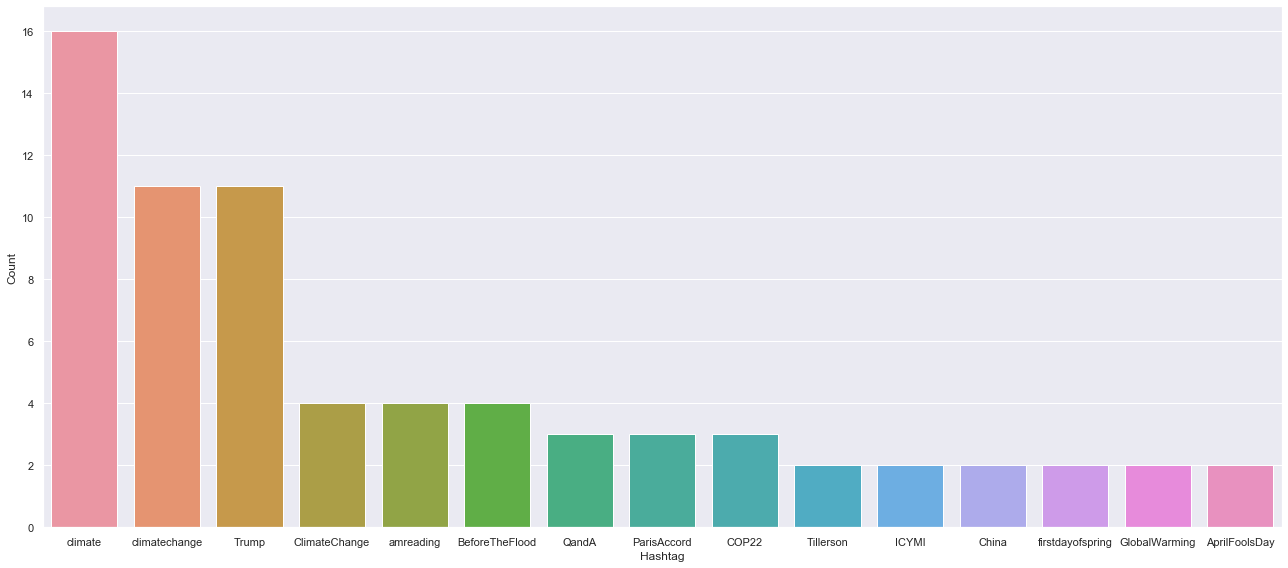

In [25]:
p = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(p.keys()), 'Count': list(p.values())})
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=d, x = 'Hashtag', y = 'Count')
plt.tight_layout()
plt.show()

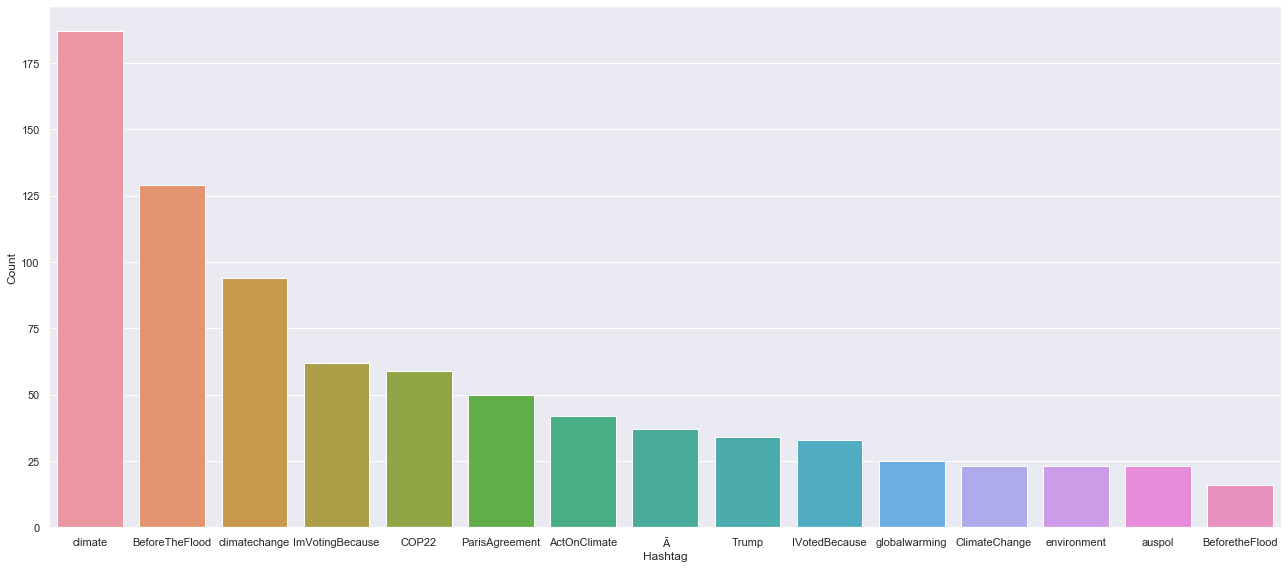

In [26]:
p = nltk.FreqDist(HT_pos)
d = pd.DataFrame({'Hashtag': list(p.keys()), 'Count': list(p.values())})
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=d, x = 'Hashtag', y = 'Count')
plt.tight_layout()
plt.show()

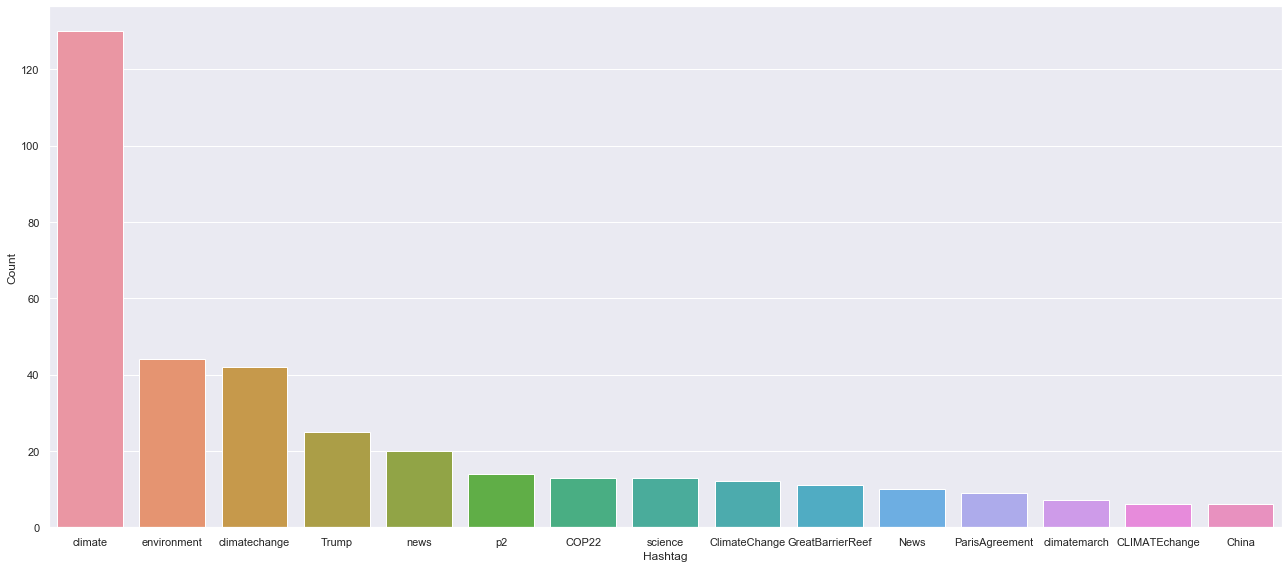

In [27]:
p = nltk.FreqDist(HT_news)
d = pd.DataFrame({'Hashtag': list(p.keys()), 'Count': list(p.values())})
d = d.nlargest(columns = 'Count', n = 15)
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=d, x = 'Hashtag', y = 'Count')
plt.tight_layout()
plt.show()

From our hashtags, we can tell that climate once again is spread out throughout all sentiments and is the most frequest apart from negative sentiment

## Study Subjectivity and Polarity

In [28]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [29]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [30]:
from textblob import TextBlob

In [31]:
df['Subjectivity'] = df['message'].apply(subjectivity)
df['Polarity'] = df["message"].apply(polarity)

In [32]:
df.head(50)

,sentiment,message,tweetid,Split_tweets,mentions,Subjectivity,Polarity
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, doesn't, think, car...",mashable,0.166667,0.083333
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It's, not, like, we, lack, evidence, of, anth...",,0.000000,0.000000
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @RawStory:, Researchers, say, we, have, t...",RawStory,0.600000,-0.300000
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#TodayinMaker#, WIRED, :, 2016, was, a, pivot...",,0.800000,0.500000
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[RT, @SoyNovioDeTodas:, It's, 2016,, and, a, r...",SoyNovioDeTodas,0.000000,0.000000
5,1,Worth a read whether you do or don't believe i...,425577,"[Worth, a, read, whether, you, do, or, don't, ...",,0.100000,0.300000
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933,"[RT, @thenation:, Mike, Pence, doesn’t, believ...",thenation,0.000000,0.000000
7,1,RT @makeandmendlife: Six big things we can ALL...,992717,"[RT, @makeandmendlife:, Six, big, things, we, ...",makeandmendlife,0.100000,0.000000
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,"[@AceofSpadesHQ, My, 8yo, nephew, is, inconsol...",AceofSpadesHQ,0.150000,0.150000
9,1,RT @paigetweedy: no offense… but like… how do ...,260471,"[RT, @paigetweedy:, no, offense…, but, like…, ...",paigetweedy,0.000000,0.000000


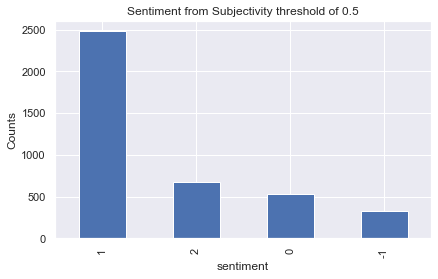

In [33]:
df[df['Subjectivity'] >=0.5]['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('sentiment')
plt.ylabel('Counts')
plt.title('Sentiment from Subjectivity threshold of 0.5')
plt.show()

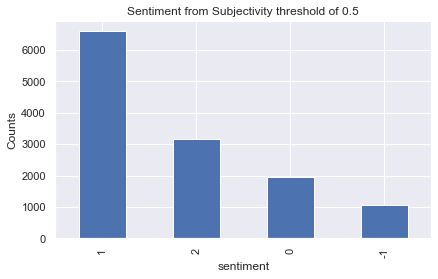

In [34]:
df[df['Subjectivity'] <=0.5]['sentiment'].value_counts().plot(kind='bar')
plt.xlabel('sentiment')
plt.ylabel('Counts')
plt.title('Sentiment from Subjectivity threshold of 0.5')
plt.show()

from this we can deduce that Subjectivity measure doesnt play a major role in being a good predictor of classifying sentiment thus it may not be an important feature. We will test again for it after preprocessing and cleaning the data

## Visualize Words and Word Frequency

In [35]:
from wordcloud import WordCloud

In [36]:
allwords = ''.join([twts for twts in df['message']])

In [37]:
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

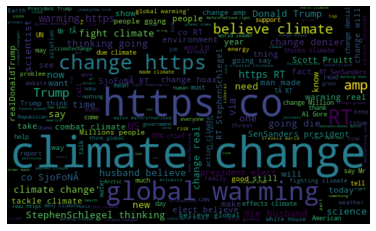

In [38]:
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

From the uncleaned data we can see there are a lot of hyperlinks. These might be of interest if we can find what type of website they lead to or we could just drop it. We can also see climate, change, and global warming are well represented since our sentiment is based on that. We can also see there is some political influence as stated above in climate change sentiment.

In [39]:
## Lets visualize the words that appear as oer sentiment

In [40]:
allwords_sent_neg = ''.join([twts for twts in df['message'][df['sentiment'] == -1]])

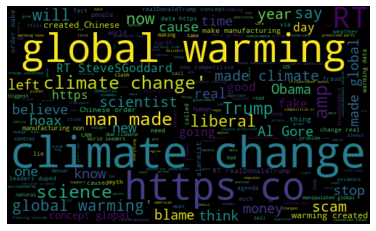

In [41]:
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords_sent_neg)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

From this we can see that there are some very negative sentiment words

In [42]:
allwords_sent_neutral = ''.join([twts for twts in df['message'][df['sentiment'] == 0]])

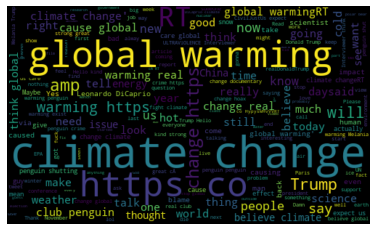

In [43]:
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords_sent_neutral)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [44]:
allwords_sent_pro = ''.join([twts for twts in df['message'][df['sentiment'] == 1]])

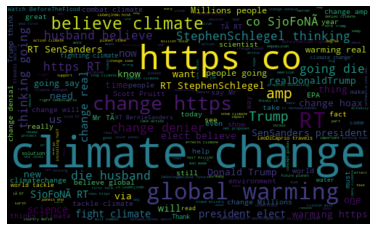

In [45]:
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords_sent_pro)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [46]:
allwords_sent_news = ''.join([twts for twts in df['message'][df['sentiment'] == 2]])

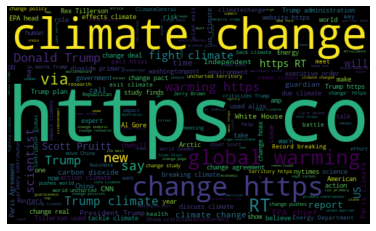

In [47]:
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords_sent_news)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

A few interesting observations after visualising the word frequency as per sentiment.

Global warming appears a lot in neutral and negative sentiiment but does not appear as much in positive sentiment

Climate Change is consistent throughout all sentiments. Maybe we could use ngrams of 3 to get more context of what exact tone is being suggested when the word climate change is present

We can see that in News related sentiment, hyperlinks are present a lot. 

Overall, we can see a combination of words are more influential in the data than just single observed words!

#### Bag Of Words

In [48]:
eda_df = df.copy()

In [49]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

from nltk.stem import WordNetLemmatizer
normalizer = WordNetLemmatizer()
def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', '', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
    return normalized

In [50]:
def create_features_dictionary(documents):
    features_dictionary = {}
    merged = " ".join(documents)
    tokens = preprocess_text(merged)
    index = 0
    for token in tokens:
        if token not in features_dictionary:
            features_dictionary[token] = index
            index += 1
    return features_dictionary

In [ ]:
x = create_features_dictionary(df['message'])

In [ ]:
{k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse = True)}

-Scott Pruitt # political #Alex Epstein Felicity Carter #Norm Ornstein #randpaul
-cathdweeb Retweets political matters
-envoriment turn it to environment
-rightwing
-theageofanalog
-minorities
-globalcooling…
-facts.…
-seriously.…
-potus…
-thingstrumpthinksareoverrated
-icanfixstupidby
-1996 at the second meeting of climate Change convention, US Agrees for the first time to legally binding emissions targets
-rhsearthscience
-screenshots
-=global
-activistã¢â‚¬â
-trumpsters=omg
//t.co remove

In [ ]:
{k: v for k, v in sorted(x.items(), key=lambda item: item[1])} ##least occuring words

In [ ]:
len(x) ##there is 32007 unique words without doing any cleaning to the data

### Chunking Words by Noun Phrasing

In [ ]:
from nltk import pos_tag
nltk.download('maxent_treebank_pos_tagger')

In [ ]:
def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text_tag(text):
    cleaned = text.lower()
    #tokenized = word_tokenize(cleaned)
    #norm = [normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized]
    #normalized = norm.pos_
    return normalized

In [ ]:
eda_df['pos_tag'] = eda_df['message'].apply(nlp)

In [ ]:
eda_df

In [ ]:
eda_df['parsed_tweets'] = eda_df['message'].apply(lambda x: [(y.lemma_, y.tag_) for y in  nlp(x)])

In [ ]:
eda_df.pos_tag[7]

In [ ]:
eda_df.parsed_tweets[7]

In [ ]:
from nltk import RegexpParser

def np_chunk_counter(chunked_sentences):

    # create a list to hold chunks
    chunks = list()

    # for-loop through each chunked sentence to extract noun phrase chunks
    for chunked_sentence in chunked_sentences:
        for subtree in chunked_sentence.subtrees(filter=lambda t: t.label() == 'NP'):
            chunks.append(tuple(subtree))

    # create a Counter object
    chunk_counter = Counter()

    # for-loop through the list of chunks
    for chunk in chunks:
        # increase counter of specific chunk by 1
        chunk_counter[chunk] += 1

    # return 30 most frequent chunks
    return chunk_counter.most_common(30)


chunk_grammar = 'NP: {<DT>?<JJ>*<NN>}'

# create RegexpParser object here
chunk_parser = RegexpParser(chunk_grammar)

# create a list to hold noun-phrase chunked sentences
np_chunked_oz = list()
for i in eda_df.parsed_tweets:
    np_chunked_oz.append(chunk_parser.parse(i))

# store and print the most common np-chunks here
most_common_np_chunks = np_chunk_counter(np_chunked_oz)
print(most_common_np_chunks)


we can notice some of the chunked phrases here being change, climate and global warming.

In [ ]:
def vp_chunk_counter(chunked_sentences):

    # create a list to hold chunks
    chunks = list()

    # for-loop through each chunked sentence to extract verb phrase chunks
    for chunked_sentence in chunked_sentences:
        for subtree in chunked_sentence.subtrees(filter=lambda t: t.label() == 'VP'):
            chunks.append(tuple(subtree))

    # create a Counter object
    chunk_counter = Counter()

    # for-loop through the list of chunks
    for chunk in chunks:
        # increase counter of specific chunk by 1
        chunk_counter[chunk] += 1

    # return 30 most frequent chunks
    return chunk_counter.most_common(30)

chunk_grammar = "VP: {<DT>?<JJ>*<NN><VB.*><RB.?>?}"
# create RegexpParser object here
chunk_parser = RegexpParser(chunk_grammar)

# create a list to hold verb-phrase chunked sentences
vp_chunked_oz = list()

# create for loop through each pos-tagged sentence in pos_tagged_oz here
for i in eda_df.parsed_tweets:
    vp_chunked_oz.append(chunk_parser.parse(i))

most_common_vp_chunks = vp_chunk_counter(vp_chunked_oz)
print(most_common_vp_chunks)

### Lexical Diversity

In [ ]:
eda_df['hashtags'] = eda_df.message.str.findall(r'#(\w+)').apply(','.join)

In [ ]:
eda_df.head()

In [ ]:
# A function for computing lexical diversity
def lexical_diversity(df):
    return len(set(df))/len(df) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return total_words/len(statuses)

In [ ]:
lexical_diversity(eda_df['message']) ## for

In [ ]:
lexical_diversity(eda_df['mentions'])

In [ ]:
lexical_diversity(eda_df['hashtags']) 

In [ ]:
average_words(eda_df['message'])

### Check Missing values, Duplicates and Empty Tweets

In [ ]:
## create clean df copy
df_clean = df.copy()

In [ ]:
df_clean.head()

In [ ]:
df_clean.iloc[:, :3].isnull().sum() ## no null values

In [ ]:
## detect and remove empty strings
blanks = []
#(returns index, label, review, text)
for i, lb, rv in df_clean.iloc[:, :2].itertuples():
    if rv.isspace():
        blanks.append(i)
### no missing values

In [ ]:
df_clean[df_clean['message'].duplicated()]
## we can see there are a lot of duplicated tweets. We need to remove them

In [ ]:
## remove duplicates
df_clean.drop_duplicates(['message'], keep = 'first', inplace = True)

In [ ]:
df_clean.reset_index(inplace=True)

In [ ]:
df_clean

## PreProcessing and Cleaning the DATA

In [ ]:
df_clean.sentiment.value_counts()

In [ ]:
#### first segment of data cleaning
def clean_text(text):
    text = re.sub(r'@', '', text) 
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', 'website', text)
    #text = text.replace(':', '')
    return text

In [ ]:
df_clean.message = df_clean.message.apply(clean_text)

In [ ]:
df_clean.message[8]

In [ ]:
df.sentiment[10000]

In [ ]:
## dealing with emoticons



In [ ]:
df_clean.message.apply(emoji)